# Pair of categorical variables description: Heatmap

Pair of categorical variables description with a plot for one or several columns in a dataframe. 

In [3]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## data

In [4]:
""" tips """

# load data
tips = sns.load_dataset("tips")
# get categorical columns
cats = ['object', 'category', 'bool', 'datetime64[ns]']
cols_cat_tips = tips.select_dtypes(include=cats).columns.tolist()


""" titanic """

# load data
titanic = sns.load_dataset('titanic')
# get categorical columns
cats = ['object', 'category', 'bool', 'datetime64[ns]']
cols_cat_titanic = titanic.select_dtypes(include=cats).columns.tolist()


""" weather """

# load data
path = 'https://raw.githubusercontent.com/jmquintana79/utilsDS/master/scripts/datasets/data/dataset.weather.csv.gz'
weather = pd.read_csv(path)
weather['datetime'] = pd.to_datetime(weather['datetime'])
# get categorical columns
cats = ['object', 'category', 'bool']
cols_cat_weater = weather.select_dtypes(include=cats).columns.tolist()

## plots

In [5]:
## multiples plots for selected columns
def multiple_plots(df:pd.DataFrame, columns:"list or str", plot_function:"function", num_plots_per_row:int = 3):
    """
    Multiples plots for selected columns.
    df -- Input dataframes.
    columns -- Column names to be plotted.
    plot_function -- Function to be plotted for each columns.
    num_plots_per_row -- Number of plots per row (default, 3).
    """
    # if columns is only one string    
    if isinstance(columns, str):
        # figsize
        figsize = (10, 10)
        # number of plots in rows / columns
        nrs = ncs = 1
    # if is a list
    elif isinstance(columns, list):
        # number of columns to be ploted
        ncolumns = len(columns)
        # number of plots in rows / columns
        nrs = math.ceil(ncolumns / num_plots_per_row)
        ncs = num_plots_per_row if ncolumns >= num_plots_per_row else ncolumns 
        # figsize
        figsize = (ncs*5, nrs*5)    
    else:
        raise
    # create figure and axis    
    fig, ax = plt.subplots(ncols = ncs, nrows = nrs, figsize = figsize)
    # if axis is an array
    if isinstance(ax, np.ndarray):
        # reshape
        ax = ax.ravel()
        # loop of axis
        for ii, c in enumerate(columns):
            # plot in cells
            _ = plot_function(df, c, ax[ii])
    # if axis is only one
    else:
        # plots only one
        _ = plot_function(df, columns[0] if len(columns) == 1 else columns, ax)
    # display plot
    plt.show()
    
    
## plot distribution of two categorical columns
def plot_2cat(df:pd.DataFrame, columns:list, ax:"matplotlib axis")->"matplotlib axis":
    # validations
    assert len(columns) == 2, "it is required a pair of columns."
    for c in columns:
        assert c in df.columns.tolist(), f"column '{c}' is not available."
    # collect columns
    column1, column2 = columns
    # collect data
    temp = df[[column1, column2]].copy()
    # add counter
    temp["num"] = np.ones(len(temp), dtype= int)
    # count categories and get pivot table
    tempp = temp.groupby([column1, column2], as_index = False)[["num"]].sum().pivot(column1, column2, "num")
    # estimate percent
    tempp = tempp *  100. / tempp.sum().sum()   
    # display or not annotation
    if np.prod(tempp.shape) > 50:
        is_annotate = False
    else:
        is_annotate = True
    # plot
    ax = sns.heatmap(tempp, annot = is_annotate, fmt = ".2f", cmap = "YlGnBu", ax = ax, cbar_kws={"label": "%"})  
    # return axis
    return ax


## multiple plots distribution of 2 categorical columns
def plots_2cat(df:pd.DataFrame, num_plots_per_row:int = 3, max_num_uniq_values:int = 24)->pd.DataFrame:
    """
    Multiple plots distribution of 2 categorical columns.
    df -- Input dataframes.
    num_plots_per_row -- Number of plots per row (default, 5).
    max_num_uniq_values -- Selected limit of possible number of values (default, 24).
    """    
    # collect numerical columns
    cols_cat = df.select_dtypes(include=['object', 'category', 'bool', 'int']).columns.tolist() 
    # remove categorical columns with too much possible values
    cols_cat = [c for c in cols_cat if len(df[c].unique()) <= max_num_uniq_values]
    
    
    
    # plot
    if len(cols_cat) > 0:
        multiple_plots(df, cols_cat, plot_2cat, num_plots_per_row = num_plots_per_row)
    else:
        raise Exception(f"There are not any column with less or equal possible values than {max_num_uniq_values}.")
        

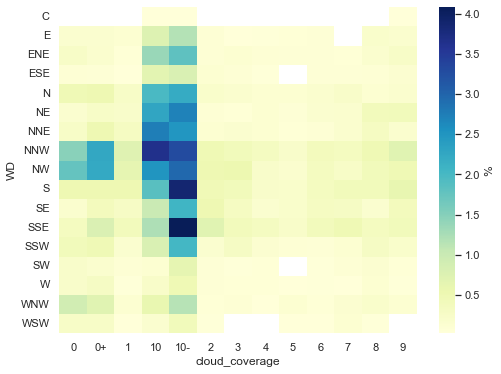

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,6))
plot_2cat(weather, cols_cat_weater, ax = ax)
plt.show()

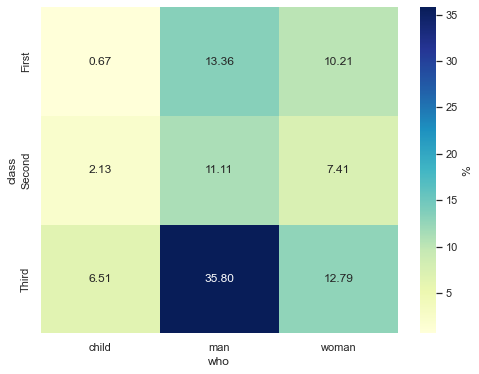

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,6))
plot_2cat(titanic, cols_cat_titanic[2:4], ax = ax)
plt.show()